In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
import pymc3

In [4]:
import theano.tensor as tht
import numpy as np

In [53]:
N, d = iris['data'].shape
k = 3 # number of clusters
model = pymc3.Model()
with model:
    #means = pymc3.MvNormal('means', mu=[np.zeros(d)]*k, tau=0.1*np.eye(d), shape=(k,d))
    means = pymc3.Normal('means', mu=[np.zeros(d)]*k, shape=(k,d))
    p = pymc3.Dirichlet('p', a=np.array([1.]*k), shape=(k,))
    #order_means_potential = pymc3.Potential('order_means_potential',
    #                                     tht.switch(means[1]-means[0] < 0, -np.inf, 0)
    #                                     + tht.switch(means[2]-means[1] < 0, -np.inf, 0))
    p_min_potential = pymc3.Potential('p_min_potential', tht.switch(tht.min(p) < .25, -np.inf, 0))
    category = pymc3.Categorical('category', p=p, shape=N)
    points = pymc3.MvNormal('obs',
                       mu=means[category],
                       tau=np.eye(d),
                       observed=iris['data'])

In [54]:
with model:
    step1 = pymc3.Metropolis(vars=[p, means])
    step2 = pymc3.ElemwiseCategorical(vars=[category], values=list(range(k)))
    tr = pymc3.sample(1000, step=[step1, step2])

/Users/dirk/.venv/p3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  This is separate from the ipykernel package so we can avoid doing imports until
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [means]
>>Metropolis: [p]
>ElemwiseCategorical: [category]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:11<00:00, 516.98draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124c1e128>,
      dtype=object)

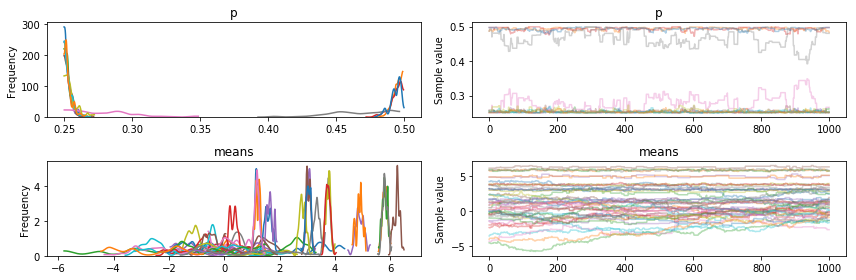

In [55]:
pymc3.plots.traceplot(tr, ['p', 'means'])

In [24]:
tr['category'][-1]

array([2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0])

In [52]:
tr['means'][700]

array([[ 5.84583038,  3.04690933,  3.66860285,  1.22634841],
       [-0.55289506, -3.28960972, -0.2332153 , -1.92456484],
       [ 2.14503043,  0.70859997,  0.24798613, -0.22623558]])

In [48]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])